# Import the various packages and the file containing the modes.
pathlib is used to define paths conveniently such that both Windows and Linux/Mac users can set their directories. 

In [1]:
import poppy
import numpy as np
import astropy.units as u
import astropy.io.fits as fits
from pathlib import Path
import os
import psutil

from importlib import reload
import misc
reload(misc)
import poppy_romancgi_modes as modes
reload(modes)
import polmap
reload(polmap)

from IPython.display import clear_output, display
clear_output()

# set debugging mode for more information from POPPY as propagation is performed
# import logging, sys
# _log = logging.getLogger('poppy')
# _log.setLevel("DEBUG")
# logging.basicConfig(stream=sys.stdout, level=logging.INFO)

## Check what packages are available for faster computations and use POPPY's configuration feature to set the options. 

The numexpr package only speeds up some calculations, but not the FFTs. POPPY defaults to numexpr if available, unless the user sets the conf value to False. 

MKL tends to be faster than pyFFTW so POPPY defaults to that if available, unless its conf value is set to False, in which case pyFFTW is used. If pyFFTW is not available or its conf value is set to False, poppy uses standard numpy FFTs.

OPENCL uses a GPU so it tends to be faster than MKL and POPPY defaults to that if available, onca again unless the user sets the conf value to False.

No testing was done with CUDA because a necessary package called pyculib must be installed, which has since been depreciated. 

In [2]:
import poppy.accel_math as am
print(am._USE_NUMEXPR)
print(am._USE_FFTW)
print(am._USE_MKL)
print(am._USE_OPENCL)
print(am._USE_CUDA)
poppy.conf.use_numexpr = True
poppy.conf.use_fftw = False
poppy.conf.use_mkl = False
poppy.conf.use_opencl = False
poppy.conf.use_cuda = False

True
True
True
True
False


# Set the parameters of the mode being run and calculate a PSF. 
Both the PSF and the POPPY FresnelWavefront objects of each plane are returned by default. Note, these wavefront objects can take up quite a bit of memory. 

DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).



NOT employing polarization aberrations.



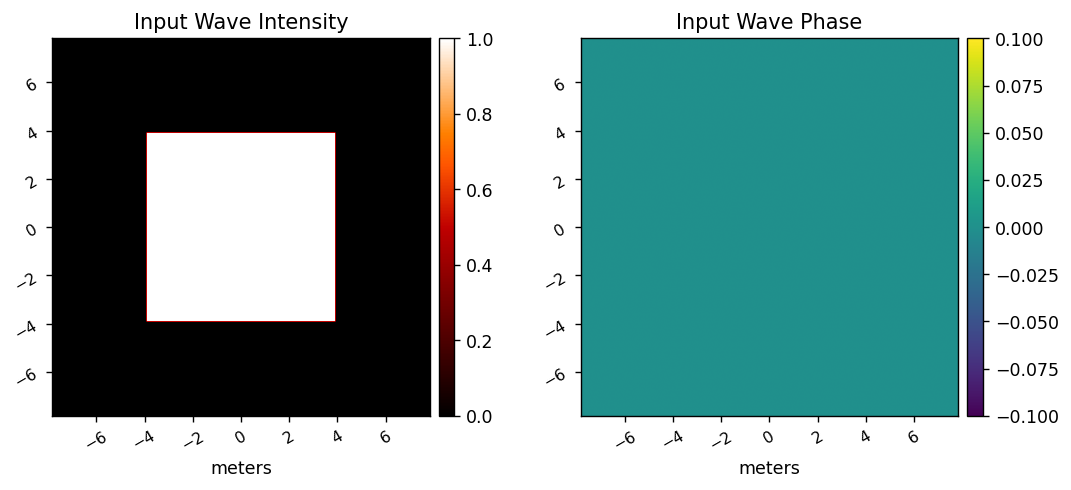

INFO:poppy:Initialized OpticalSystem: HLC575
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Fold 1 after separation: 2.99e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.68e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: Fold 2 after separation: 3.51e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: OAP1 after separation: 3.55e-01 m 
INFO:poppy:Added optic: FOCM after separation: 7.68e-01 m 
INFO:poppy:Added optic: OAP2 after separation: 3.14e-01 m 
INFO:poppy:Added optic: DM1 Plane (No Optic) after separation: 7.76e-01 m 
INFO:poppy:Added optic: DM2 Plane (No Optic) after separation: 1.00e+00 m 
INFO:poppy:Added optic: OAP3 after separation: 3.95e-01 m 
INFO:poppy:Added optic: Fo

DEBUG:poppy:Applying spherical lens phase =1.71e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 6.743813536526962e-07 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=1.0945004015804018 m
DEBUG:poppy:Applying spherical phase curvature =1.09e+00 m
DEBUG:poppy:Applying spherical lens phase =9.14e-01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.662847 s, full function  in 0.669 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 6.96e+00 m ------
DEBUG:poppy:------ Applying Lens: M3 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.586e-07 m, z_w0=5.865e+00 m
z=6.960e+00 m, z_r=4.028e-06 m
DEBUG:poppy:  Beam radius at M3 =2.33e-01 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:8.586e-07 m, z_w0=5.865e+00 m
z=6.960e

DEBUG:poppy:  Propagating wavefront to Lens: OAP1, with focal length 0.503331895563883 m after distance 0.354826767220001 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 1897.5636879351707 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.354826767220001 m
DEBUG:poppy:  Constant Pixelscale: 0.00013022277641948566 m / pix
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.666463 s, full function  in 0.673 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.659417 s, full function  in 0.666 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 9.40e+00 m ------
DEBUG:poppy:------ Applying Lens: OAP1 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:6.647e-02 m, z_w0=1.898e+03 m
z=9.404e+00 m, z_r=2.414e+04 m
DEBUG:poppy:  Beam radius at OAP1 =6.67e-02 m
DEBUG:poppy: input flat wavefront and OAP1 has output beam curvature of =-5.03e-01 m
DEBUG:poppy:OAP1 

DEBUG:poppy:Applying spherical phase curvature =8.50e+08 m
DEBUG:poppy:Applying spherical lens phase =1.18e-09 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP3
DEBUG:poppy:------ Optic: OAP3 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: Fold 3 after distance 0.505329955078121 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 13.874231094795785 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.0001498403401418178 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=1.217276465924245 m
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.664357 s, full function  in 0.670 s
DEBUG:poppy:Applying spherical phase curvature =1.22e+00 m
DEBUG:poppy:Applying spherical lens phase =8.22e-01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 2.28085862888025e-06 m /

DEBUG:poppy:    FFT_2D: FFT in 0.673720 s, full function  in 0.680 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.686196 s, full function  in 0.693 s
DEBUG:poppy:Waist to Spherical propagation, dz=0.5481888231567531 m
DEBUG:poppy:Applying spherical phase curvature =5.48e-01 m
DEBUG:poppy:Applying spherical lens phase =1.82e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.669629 s, full function  in 0.676 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.62e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP6 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:3.562e-06 m, z_w0=1.570e+01 m
z=1.625e+01 m, z_r=6.932e-05 m
DEBUG:poppy:  Beam radius at OAP6 =2.82e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:3.562e-06 m, z_w0=1.570e+01 m
z=1.625

DEBUG:poppy:  Multiplied WF by phasor for Optic: Filter
DEBUG:poppy:  Propagating wavefront to Lens: LENS, with focal length 0.296018684431726 m after distance 0.170799548215162 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.531776283686227 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.170799548215162 m
DEBUG:poppy:  Constant Pixelscale: 1.6389494401442124e-05 m / pix
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.676509 s, full function  in 0.683 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.679031 s, full function  in 0.685 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.88e+01 m ------
DEBUG:poppy:------ Applying Lens: LENS ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.391e-03 m, z_w0=1.853e+01 m
z=1.880e+01 m, z_r=3.847e+02 m
DEBUG:poppy:  Beam radius at LENS =8.39e-03 m
DEBUG:poppy: input flat wavefront and LENS has

<Figure size 1080x1080 with 0 Axes>

FPM pixelscale:  2.7974922168357518e-06 m / pix


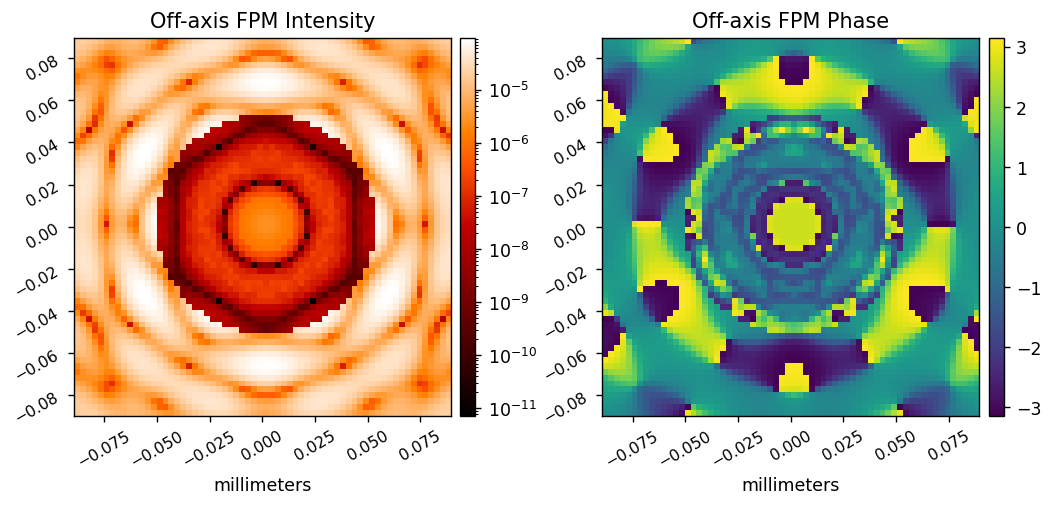

PSF pixelscale:  5.0709718911577785e-06 m / pix


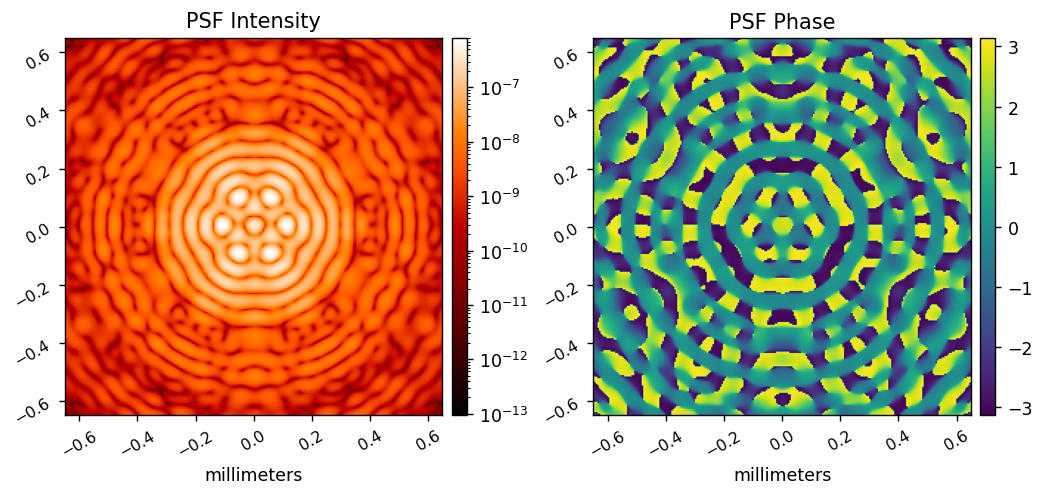

In [5]:
reload(modes)

mode = 'HLC575'
use_dms = False
use_opds = False
use_apertures = False
use_fieldstop = False
polaxis = 0
cgi_dir = Path('C:/Users/Kian Milani/Desktop/webbpsf-data/CGI')
cgi_dir = Path('/groups/douglase/webbpsf-data/CGI')
psf, wfs = modes.run_model(npix=1024,
                           oversample=2,
                           mode=mode,
#                            lambda_m=730e-9*u.m, 
#                            offsets=(4.5,0),
                           use_fpm=True,
                           use_opds=use_opds,
                           use_dms=use_dms, 
                           use_fieldstop=use_fieldstop,
                           use_apertures=use_apertures,
                           polaxis=polaxis,
                           cgi_dir=cgi_dir,
                           display_mode=False,
                           display_inwave=True,
                           display_intermediates=False,
                           display_fpm=True,
                           display_psf=True)

In [20]:
(100.442+99.623)/5

30.238

PROPER wavefront pixelscale:  4.26692839634194e-06 m / pix
PROPER wavefront pixelscale in λ/D:  0.1
Input POPPY wavefront pixelscale:  2.133167626733244e-05 m / pix
Interpolated POPPY wavefront pixelscale:  4.26692839634194e-06 m / pix


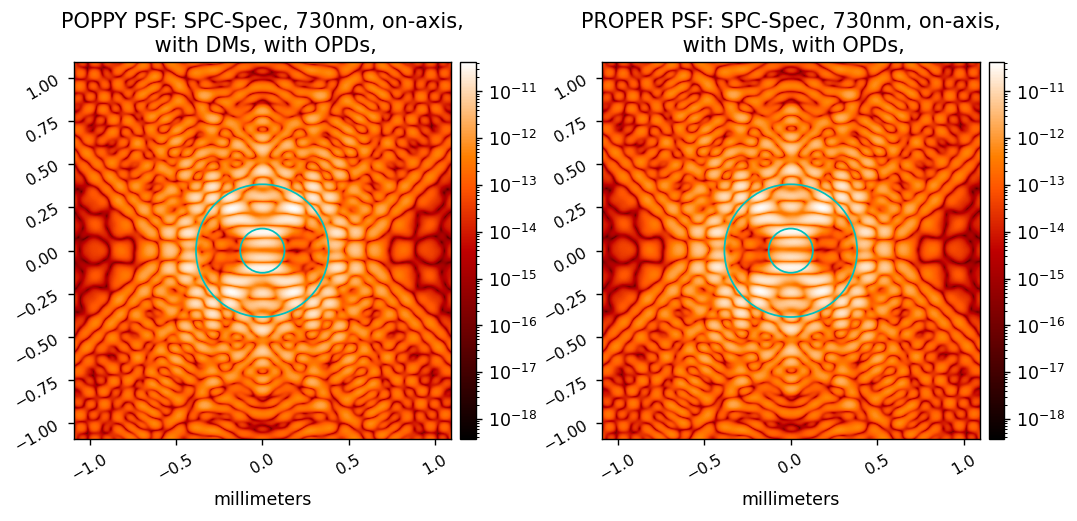

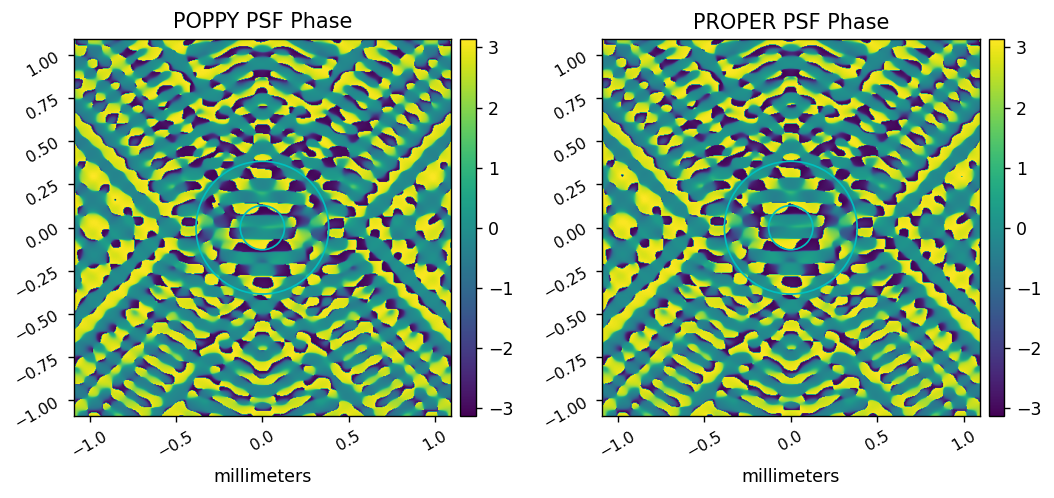

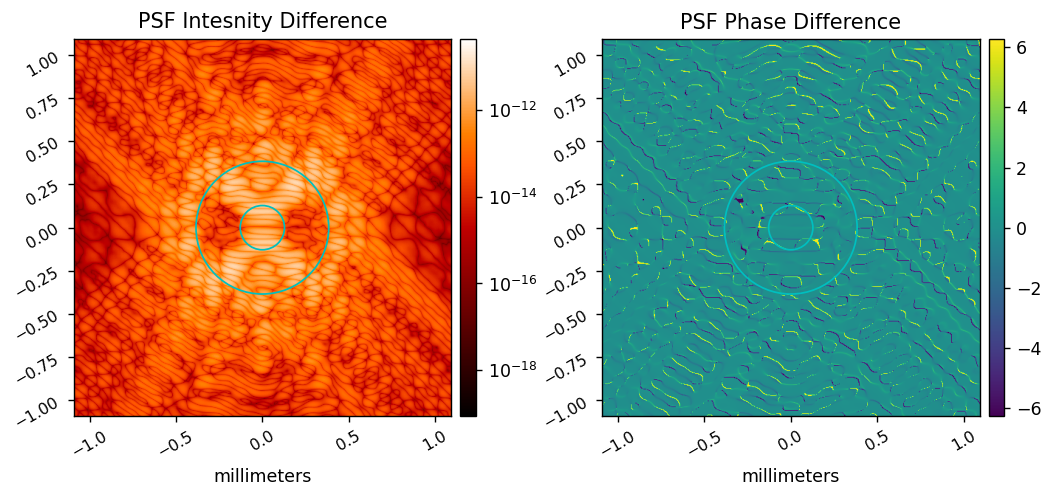

In [16]:
reload(modes)
reload(misc)
prop_psf_fpath = Path('proper-psfs/spc-spec/proper_psf_onax_opds_dms.fits')
modes.compare_psfs(wfs[-1], prop_psf_fpath)


# Save the wavefronts to a specific directory if desired. 

In [19]:
reload(modes)
modes.save_waves(wfs, use_apertures, use_opds, npix=1000, wfdir=Path('C:/Users/Kian Milani/Desktop/roman-waves/spc-spec'))

Saving wavefronts: 
0 Saved pupil wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_pupil_poppy.fits
1 Saved primary wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_primary_poppy.fits
2 Saved primary_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_primary_opd_poppy.fits
3 Saved g2o_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_g2o_opd_poppy.fits
4 Saved secondary wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_secondary_poppy.fits
5 Saved secondary_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_secondary_opd_poppy.fits
6 Saved fold1 wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_fold1_poppy.fits
7 Saved fold1_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_fold1_opd_poppy.fits
8 Saved m3 wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_m3_poppy.fits
9 Saved m3_opd wavefront to C:\Users\Kian Milani\Desktop\roma

In [74]:
onax_fpm = wfs[19]

In [85]:
offax_fpm = wfs[19]

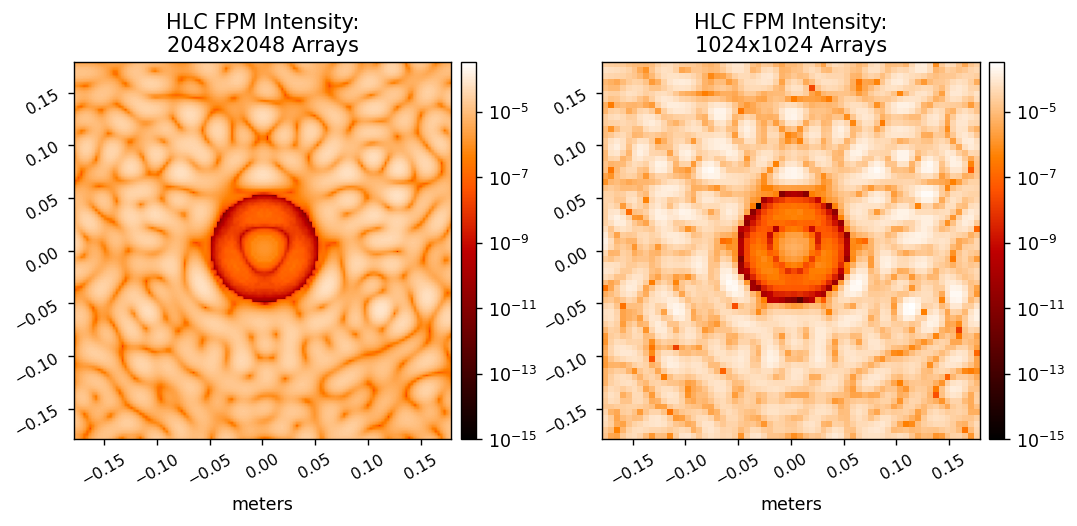

In [88]:
misc.myimshow2(np.abs(onax_fpm.wavefront)**2, np.abs(offax_fpm.wavefront)**2,
               'HLC FPM Intensity:\n2048x2048 Arrays', 'HLC FPM Intensity:\n1024x1024 Arrays',
               npix1=128,npix2=64,
               cmap1='gist_heat', cmap2='gist_heat',
               lognorm1=True, lognorm2=True, vmin1=1e-15, vmin2=1e-15, 
               vmax1=np.max(np.abs(offax_fpm.wavefront)**2), vmax2=np.max(np.abs(offax_fpm.wavefront)**2),
               pxscl1=onax_fpm.pixelscale.to(u.mm/u.pix), pxscl2=offax_fpm.pixelscale.to(u.mm/u.pix))